In [1]:
# sys, file and nav packages:
import datetime as dt

# math packages:
import pandas as pd
import numpy as np
from scipy import stats
from statsmodels.distributions.empirical_distribution import ECDF

# charting:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import ticker
from matplotlib import colors
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import matplotlib.gridspec as gridspec

# home brew utitilties
import resources.utility_functions as ut
import resources.chart_kwargs as ck
import resources.sr_ut as sut

# images and display
import base64, io, IPython
from PIL import Image as PILImage
from IPython.display import Markdown as md
from IPython.display import display, Math, Latex

plt.ion()

# set some parameters:
today = dt.datetime.now().date().strftime("%Y-%m-%d")
start_date = '2020-03-01'
end_date ='2021-10-01'

author = "analyst@hammerdirt"


# set the fail rate to test
a_fail_rate = 50

# name of the output folder:
name_of_project = 'alpes-valaisannes'

# set the maps
bassin_map = PILImage.open("resources/maps/alpesvalaisannes.jpeg")
land_use_map = PILImage.open("resources/maps/land_use_aare.jpeg")

# the search term for the river bassin
bassin_name = 'les-alpes'

# use water_name_slug
lakes_of_interest = ['alpes-']
lake_colors=["darkblue", 'aquamarine', 'dodgerblue', 'teal']

# the names for the survey area and the cumulative data
level_names = ["Les Alpes","All survey areas"]

# the scale for pieces per meter and the column and chart label for the units
reporting_unit = 100
unit_label = 'p/100m'

# add the folder to the directory tree:
project_directory = ut.make_project_folder('output', name_of_project)

# colors for gradients
colors = ['beige', 'navajowhite', 'tan', 'sandybrown','coral', 'salmon', 'sienna', 'maroon','red']
nodes = [0.0, 0.12, 0.24, 0.36, 0.48, 0.6, 0.72, 0.84, 1.0]
cmap2 = LinearSegmentedColormap.from_list("mycmap", list(zip(nodes, colors)))

# get your data:
survey_data = pd.read_csv('resources/combined_aples_lakes_surveys.csv')
river_bassins = ut.json_file_get("resources/river_basins.json")
dfBeaches = pd.read_csv("resources/beaches_with_land_use_rates.csv")
dfCodes = pd.read_csv("resources/codes_with_group_names_2015.csv")
dfDims = pd.read_csv("resources/dims_data.csv")

# set the index of the beach data to location slug
dfBeaches.set_index('slug', inplace=True)

# map locations to feature names
location_wname_key = dfBeaches.water_name_slug

# map water_name_slug to water_name
# wname_wname = dfBeaches[['water_name_slug','water_name']].reset_index(drop=True).drop_duplicates()
# wname_wname.set_index('water_name_slug', inplace=True)

# convenience function for doing land use correlations
def make_plot_with_spearmans(data, ax, n):
    sns.scatterplot(data=data, x=n, y=unit_label, ax=ax, color='black', s=30, edgecolor='white', alpha=0.6)
    corr, a_p = stats.spearmanr(data[n], data[unit_label])
    return ax, corr, a_p

# index the code data
dfCodes.set_index("code", inplace=True)

# these descriptions need to be shortened for display
dfCodes = sut.shorten_the_value(["G74", "description", "Insulation: includes spray foams"], dfCodes)
dfCodes = sut.shorten_the_value(["G940", "description", "Foamed EVA for crafts and sports"], dfCodes)
dfCodes = sut.shorten_the_value(["G96", "description", "Sanitary-pads/tampons, applicators"], dfCodes)
dfCodes = sut.shorten_the_value(["G178", "description", "Metal bottle caps and lids"], dfCodes)
dfCodes = sut.shorten_the_value(["G82", "description", "Expanded foams 2.5cm - 50cm"], dfCodes)
dfCodes = sut.shorten_the_value(["G81", "description", "Expanded foams .5cm - 2.5cm"], dfCodes)
dfCodes = sut.shorten_the_value(["G117", "description", "Expanded foams < 5mm"], dfCodes)
dfCodes = sut.shorten_the_value(["G75", "description", "Plastic/foamed polystyrene 0 - 2.5cm"], dfCodes)
dfCodes = sut.shorten_the_value(["G76", "description", "Plastic/foamed polystyrene 2.5cm - 50cm"], dfCodes)
dfCodes = sut.shorten_the_value(["G24", "description", "Plastic lid rings"], dfCodes)
dfCodes = sut.shorten_the_value(["G33", "description", "Lids for togo drinks plastic"], dfCodes)
dfCodes = sut.shorten_the_value(["G3", "description", "Plastic bags, carier bags"], dfCodes)
dfCodes = sut.shorten_the_value(["G204", "description", "Bricks, pipes not plastic"], dfCodes)

# make a map to the code descriptions
code_description_map = dfCodes.description

# make a map to the code descriptions
code_material_map = dfCodes.material

(lesalpes)=

# Les Aples 

The Alpes is a survey area configured and managed by the Summit Foundation. The IQAASL project also included the process of onboarding other associations or groups and maintaining a basic reporting system that could be maintained by staff of either organization. Summit foundation made time in their busy summer clean up tour to schedule a series of litter-surveys. 

Summit Foundation conducts [clean up events throughout](https://www.summit-foundation.org/en/) the Swiss Alpes. At each clean up event a section of mountain trail or Ski lift line is sampled for litter in the same way that beach-litter surveys are conducted on the waters edge.

1. A section of trail is measured
2. All visible pollutants are removed counted and classified.
3. The results and dimensions are recorded

The Swiss Alpes have a mature and extensive network of ski-lifts and gondolas that make it a popular destination in the winter and summer.

## Survey area cumulative totals

*Map of survey area _Les Alpes_, summer clean up tour 2021*

**Note: the p/100m value capped for Veysonnaz for reasons of scale**


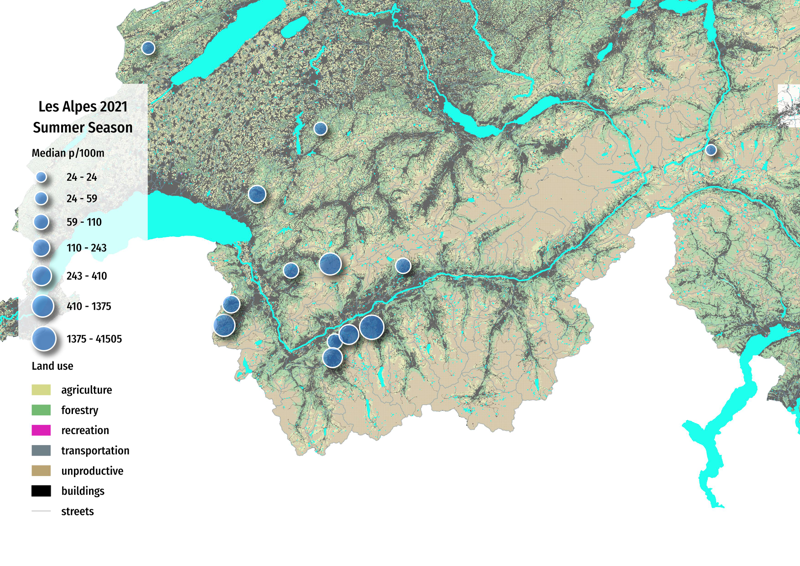

In [2]:
output = io.BytesIO()
bassin_map.thumbnail((800, 1200))
bassin_map.save(output, format='PNG')
encoded_string = base64.b64encode(output.getvalue()).decode()

html = '<img src="data:image/png;base64,{}"/>'.format(encoded_string)
IPython.display.HTML(html)

In [3]:
# define the final survey data set here:
a_data = survey_data.copy()

# convert string dates from .csv to timestamp
a_data['date']=pd.to_datetime(a_data['date'], format='%Y-%m-%d')

# slice by start - end date
a_data = a_data[(a_data.date >= start_date)&(a_data.date <= end_date)]

# make a loc_date column from the survey data
a_data['loc_date']=tuple(zip(a_data.location, a_data.date))

# assign the reporting value
# a_data[unit_label] = (a_data.pcs_m * reporting_unit).round(2)

# scale the streets to kilometers
a_data['streets'] = a_data.streets.astype('int')

# save the data before aggregating to test
before_agg = pd.read_csv("resources/checked_alpes_survey_data_be.csv")

# Combine the different sizes of fragmented plastics and white expanded polystyrene
# the codes for the foams
# some_foams = ['G81', 'G82', 'G83']

# the codes for the fragmented plastics
some_frag_plas = list(a_data[a_data.groupname == 'plastic pieces'].code.unique())

# a common aggregation
agg_pcs_quantity = {unit_label:'sum', 'quantity':'sum'}

# the daily survey totals of all the data for the survey period
a_dt = a_data.groupby(['loc_date', 'date',"location"], as_index=False).agg(agg_pcs_quantity)

# define the feature data
fd = a_data[a_data.river_bassin == 'les-alpes'].copy()

# the totals for each survey and the locations in the feature data
fd_dt=fd.groupby(['loc_date', 'date',"location"], as_index=False).agg(agg_pcs_quantity)

# the unique locations and samples
fd_locs = fd.location.unique()
fd_samps = fd.loc_date.unique()

# gather the dimensional data for the time frame from dfDims
# match records to survey data
fd_dims= dfDims[(dfDims.location.isin(fd_locs))&(dfDims.date >= start_date)&(dfDims.date <= end_date)].copy()

# make a loc_date column and get the unique values
fd_dims['loc_date'] = list(zip(fd_dims.location, fd_dims.date))

# key the quantity from the survey totals to the dimensional data
try_this = {(x[0],dt.datetime.strftime(x[1].to_pydatetime(), "%Y-%m-%d")):fd_dt[fd_dt.loc_date == x]['quantity'].to_numpy()[0] for x in fd_dt.loc_date.unique()}

# map quantity per survey to the dims data
fd_dims['quantity'] = fd_dims.loc_date.map(lambda x: ut.use_this_key(x, try_this))

# keep the dims that did not get tagged with a qty
no_qty = fd_dims[fd_dims.quantity == 'bad key']

# drop the dims that did not match
som_dims = fd_dims[fd_dims.quantity != 'bad key'].copy()

# identify the surveys with no matching dimensional data
no_matching_dim_records = [x for x in list(fd_samps) if x not in list(fd_dims.loc_date.unique())]

# survey totals
dt_all = a_data.groupby(['loc_date','location','river_bassin', 'date'], as_index=False).agg(agg_pcs_quantity)

# gather the municpalities and the population:
fd_pop_map = dfBeaches.loc[fd.location.unique()][['city','population']].copy()
fd_pop_map.drop_duplicates(inplace=True)
fd_pop_map.set_index('city', drop=True, inplace=True)

# code totals for the river bassin
fd_code_t= fd.groupby(['code', 'groupname'], as_index=False).agg({'quantity':'sum', 'fail':'sum', unit_label:'median'})
fd_code_t.rename(columns={"groupname":'utility'}, inplace=True)
fd_code_t["% of total"] = fd_code_t.quantity/fd_code_t.quantity.sum()
fd_code_t.set_index('code', inplace=True)
fd_code_t.sort_values(by='quantity', ascending=False, inplace=True)
fd_code_t['material'] = fd_code_t.index.map(lambda x: code_material_map[x])
fd_code_t['item'] = fd_code_t.index.map(lambda x: code_description_map.loc[x])
fd_code_t["% of total"] = (fd_code_t["% of total"]*100).round(1)
fd_code_t["fail rate"] = ((fd_code_t["fail"]/len(fd.loc_date.unique()))*100).round(1)

# objects with a fail rate of > 50% in the survey area
most_common = fd_code_t[fd_code_t["fail rate"] > 50].sort_values(by='quantity', ascending=False)

# material totals:
fd_mat_t = fd_code_t[['material', 'quantity']].groupby('material', as_index=False).quantity.sum()
fd_mat_t["% of total"] = fd_mat_t.quantity/fd_mat_t.quantity.sum()

# map total quantity per feature:
qty_all_features = fd.groupby("location").quantity.sum()
# qty_feature = {wname_wname.loc[x][0]:qty_all_features[x] for x in qty_all_features.index}

# summary statistics:
fd_n_samps = len(fd_samps)
fd_n_obj = fd.quantity.sum()
fd_n_locs = len(fd_locs)
fd_n_munis = len(fd_pop_map.index)
fd_effected_population = fd_pop_map.sum()

lakes = dfBeaches.loc[(dfBeaches.index.isin(fd_locs))&(dfBeaches.water == 'l')]['water_name'].unique()
rivers = dfBeaches.loc[(dfBeaches.index.isin(fd_locs))&(dfBeaches.water == 'r')]['water_name'].unique()

obj_string = '{:,}'.format(fd_n_obj)
surv_string = '{:,}'.format(fd_n_samps)
pop_string = '{:,}'.format(int(fd_effected_population[0]))

date_quantity_context = F"For the period between {start_date[:-3]} and {end_date[:-3]}, {obj_string } objects were removed and identified in the course of {surv_string} surveys."
geo_context = F"Those surveys were conducted at {fd_n_locs} different locations."
admin_context = F"There are {fd_n_munis} different municipalities represented in these results."
munis_joined = ', '.join(sorted(fd_pop_map.index))

# put that all together:
lake_string = F"""
{date_quantity_context} {geo_context } {admin_context}

\n\n{munis_joined}"""

In [4]:
md(lake_string)


For the period between 2020-03 and 2021-10, 6,637 objects were removed and identified in the course of 13 surveys. Those surveys were conducted at 13 different locations. There are 12 different municipalities represented in these results.



Andermatt, Châtel-Saint-Denis, La Roche, Lens, Nendaz, Ollon, Ormont-Dessus, Riddes, Troistorrents, Val de Bagnes, Val-d'Illiez, Val-de-Travers

### Sample totals

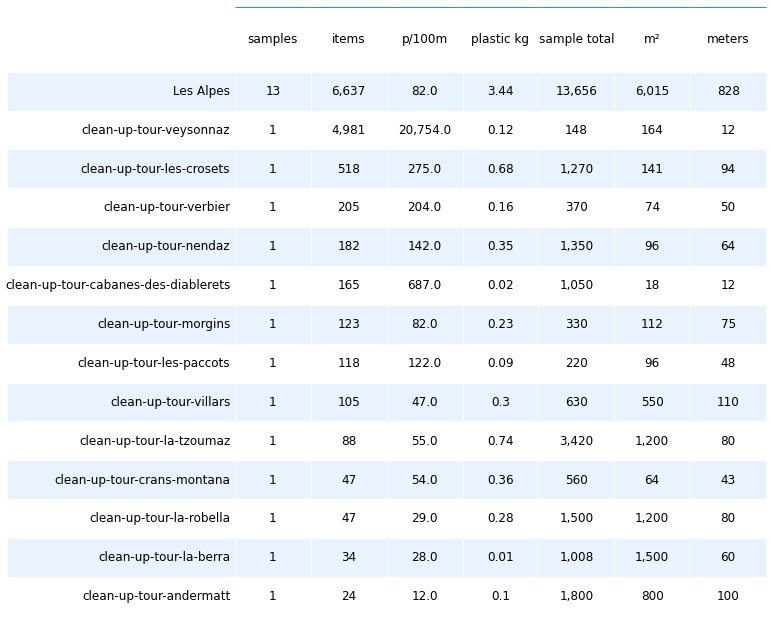

In [5]:
# aggregate the dimensional data down to the lake or river

# som_dims[location] = som_dims.location.map(lambda x: location_wname_key.loc[x])
som_dims[unit_label] = ((som_dims.quantity/som_dims.length)*50).astype('int')

agg_for_table = {
    'quantity':'sum',
    unit_label:'mean',
    'total_w':'sum',
    'mac_plast_w':'sum',
    'mic_plas_w':'sum',
    'area':'sum',
    'length':'sum',
    'num_parts_other':'sum',
    'num_parts_staff':'sum',
    'time_minutes':'sum'
    
}

dims_table = som_dims.groupby(["location"]).agg(agg_for_table )

# collect the number of samples from the survey total data:
for name in dims_table.index:
    dims_table.loc[name, 'samples'] = fd_dt[fd_dt.location == name].loc_date.nunique()

# get the sum of all survey areas
dims_table.loc["Les Alpes"]= dims_table.sum(numeric_only=True, axis=0)

dims_table.loc["Les Alpes", unit_label] = som_dims.groupby(["location"])[unit_label].sum().median()

# for display
dims_table.sort_values(by=["quantity"], ascending=False, inplace=True)
dims_table.rename(columns={'samples':'samples','quantity':'items', 'total_w':'total kg', unit_label:unit_label, 'mac_plast_w':'plastic kg', 'mic_plas_w':'sample total', 'area':'m²', 'length':'meters'}, inplace=True)

# order the columns
dims_table = dims_table[['samples', *dims_table.columns[:-1]]]

# format kilos
dims_table['plastic kg'] = dims_table['plastic kg']/1000

# format for printing
dims_table.rename(columns={'num_parts_other':'participants', 'num_parts_staff':'staff', 'time_minutes':'time'}, inplace=True)

# numerical types and columns
tints = ['samples', 'items', 'total kg', 'sample total', 'm²', 'participants', 'staff', 'time', 'meters']
twodec = [unit_label, 'plastic kg' ]

dims_table[tints] = dims_table[tints].astype('int')
dims_table[twodec] = dims_table[twodec].round(2)
dims_table['time'] = (dims_table['time']/60).astype('int')

commas = ['items','total kg', 'sample total', 'meters', 'm²', unit_label]

dims_table[commas] = dims_table[commas].applymap(lambda x: F"{x:,}")

# table one
data = dims_table.reset_index()
table_one = dims_table[['samples', 'items',unit_label,"plastic kg","sample total", "m²", "meters"]].copy()
table_one.reset_index(inplace=True, )

a_color='dodgerblue'

fig, axs = plt.subplots(figsize=(len(table_one.columns)*1.7,len(table_one)*.8))
ut.hide_spines_ticks_grids(axs)

the_first_table_data = axs.table(table_one.values,  colLabels=table_one.columns, colWidths=[.3, *[.1]*7], bbox=[0, 0, 1, 1])

a_summary_table_one = sut.make_a_summary_table(the_first_table_data,table_one.values,table_one.columns, a_color, s_et_bottom_row=False)

a_summary_table_one.get_celld()[(0,0)].get_text().set_text(" ")

plt.show()
plt.tight_layout()
plt.close()

### Event totals

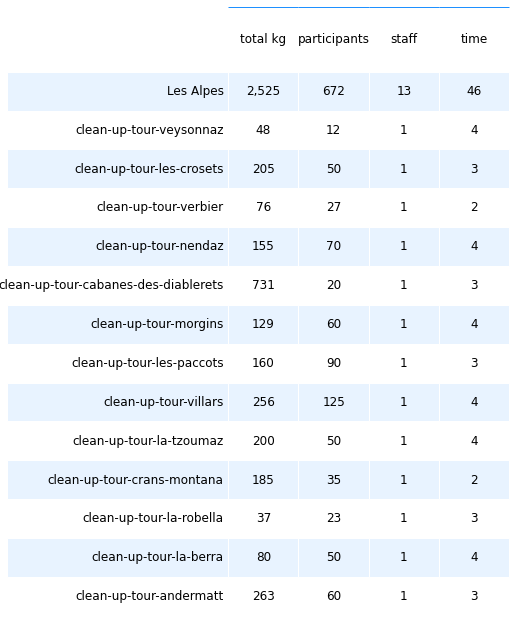

In [6]:
# table two event totals
table_two = dims_table[["total kg", "participants","staff", "time"]].copy()
table_two.reset_index(inplace=True, )

fig, axs = plt.subplots(figsize=(len(table_two.columns)*1.8,len(table_one)*.8))
ut.hide_spines_ticks_grids(axs)

the_first_table_data = axs.table(table_two.values,  colLabels=table_two.columns, colWidths=[.44, *[.14]*4], bbox=[0, 0, 1, 1])

a_summary_table_one = sut.make_a_summary_table(the_first_table_data,table_two.values,table_two.columns, a_color, s_et_bottom_row=False)

a_summary_table_one.get_celld()[(0,0)].get_text().set_text(" ")

plt.show()
plt.tight_layout()
plt.close()

## Land use profile of the surveys

The distribution of the number of surveys completed at the different land use rates. The land use is reported as the percent of total area attributed to each land use category within a 1500m  radius of the survey location. Streets are reported as the total number of kilometers of streets within the 1500m radius. Intersects is also an ordinal ranking of the number of rivers/canals that intersect a lake within 1500m of the survey location.

The land use profile of all the surveys is used as a reference distribution.

In [7]:
# explanatory variables:
luse_exp = ['% to buildings', '% to recreation', '% to agg', '% to woods', 'streets', 'intersects']

# columns needed
use_these_cols = ['loc_date' ,'% to buildings', '% to trans', '% to recreation', '% to agg', '% to woods','population','location','streets', 'intersects', 'groupname','code']
# lakes_s = dfBeaches.loc[(dfBeaches.index.isin(fd_locs))&(dfBeaches.water == 'l')]['location'].unique()

# the land use data of region in question
dfdt = fd.groupby(use_these_cols[:-2], as_index=False).agg(agg_pcs_quantity)

# figure caption
site_string = F"""
*{level_names[0]}: land use attributes of the survey locations. Distribution of samples with respect to land use.* 
"""
md(site_string)


*Les Alpes: land use attributes of the survey locations. Distribution of samples with respect to land use.* 


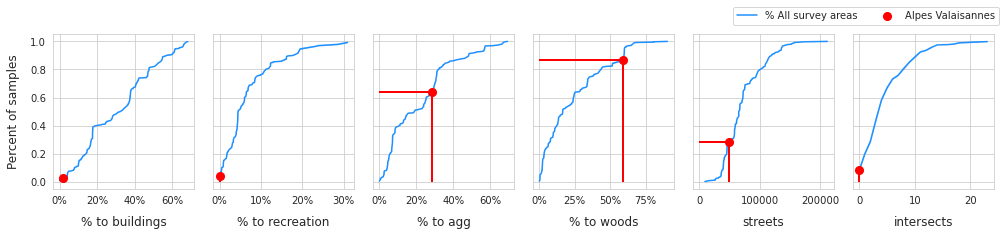

In [8]:
sns.set_style("whitegrid")

fig, axs = plt.subplots(1,len(luse_exp), figsize=(14,3), sharey=True)

# the land use data of the reference value
datax = a_data.groupby(use_these_cols[:-2], as_index=False).agg(agg_pcs_quantity)

# work off the copy
data = dfdt.copy()

for i, n in enumerate(luse_exp):    
    
    ax=axs[i]    
    # get the empirical distribution of the independent variable
    the_data = ECDF(datax[n].values)
    x, y = the_data.x, the_data.y   
    
    # plot that
    sns.lineplot(x=x, y=y, ax=ax, color='dodgerblue', label="% All survey areas")
    
    # get the median from region of interest
    the_median = data[n].median()
    
    # get its position reference the surrounding survey area
    a = (stats.percentileofscore(the_data.x, the_median))/100
    
    # plot the median and drop horzontal and vertical lines
    ax.scatter([the_median], a, color='red',s=50, linewidth=2, zorder=100, label="Alpes Valaisannes")
    ax.vlines(x=the_median, ymin=0, ymax=a, color='red', linewidth=2)
    ax.hlines(xmax=the_median, xmin=0, y=a, color='red', linewidth=2)
    
    # save the handels and labels but remove them from the ax    
    handles, labels = ax.get_legend_handles_labels()
    ax.get_legend().remove()
    
    # format the % of total on the xaxis:
    if i <= 3:
        if i == 0:            
            ax.set_ylabel("Percent of samples", **ck.xlab_k)
        ax.xaxis.set_major_formatter(ticker.PercentFormatter(1.0, 0, '%'))        
    else:
        pass
    ax.set_xlabel(n, **ck.xlab_k)

plt.tight_layout()
fig.legend(handles, labels, bbox_to_anchor=(1,1.1), loc='upper right', ncol=2)
plt.show()

*Reference value : All survey areas* 

*Land use profile Alpes Valaisannes*

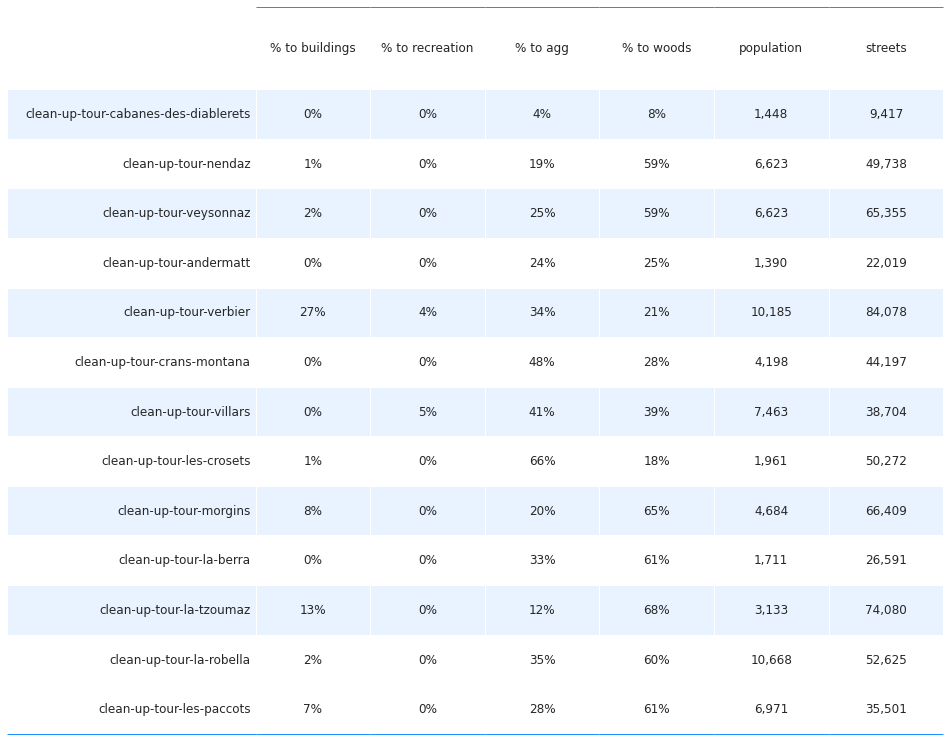

In [9]:
# get the land use profile of AV
lu_prof = fd[['location','% to buildings', '% to recreation', '% to agg', '% to woods','population','streets']].drop_duplicates()

# format for printing
lu_prof.loc[:,lu_prof.columns[1:-2]] = lu_prof.loc[:,lu_prof.columns[1:-2]].applymap(lambda x: F"{int((x*100))}%")
lu_prof.loc[:, lu_prof.columns[5:]] = lu_prof.loc[:, lu_prof.columns[5:]].applymap(lambda x: F"{int(x):,}")

# put that to a table
table_one=lu_prof.copy()

fig, axs = plt.subplots(figsize=(len(table_one.columns)*1.9,len(table_one)*.8))
ut.hide_spines_ticks_grids(axs)

the_first_table_data = axs.table(table_one.values,  colLabels=table_one.columns, colWidths=[.26, *[.12]*7], bbox=[0, 0, 1, 1])

a_summary_table_one = sut.make_a_summary_table(the_first_table_data,table_one.values,table_one.columns, a_color, s_et_bottom_row=True)

a_summary_table_one.get_celld()[(0,0)].get_text().set_text(" ")
plt.tight_layout()
plt.show()

*The total trash collected at Veysonnaz and the team that collected it*


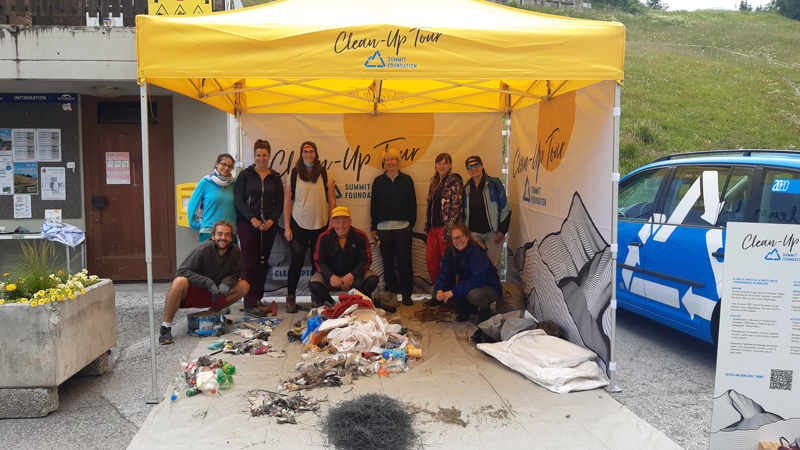

In [10]:
teamv = PILImage.open("resources/images/veysonnaz_team.jpg")
output = io.BytesIO()
teamv.thumbnail((800,450))
teamv.save(output, format='PNG')
encoded_string = base64.b64encode(output.getvalue()).decode()

html = '<img src="data:image/png;base64,{}"/>'.format(encoded_string)
IPython.display.HTML(html)

### Choosing survey sites

The survey locations were selected on site by the staff of Summit Foundation. The surveys were part of the summer clean up tour.

In [11]:
site_string = F"""*The survey locations represent the land use conditions accesible to approximateley {pop_string} people.*
"""
md(site_string)

*The survey locations represent the land use conditions accesible to approximateley 60,435 people.*


## Survey results all objects

Survey totals by date for all surveys. Rescaled plots are on the right in the case of extreme values.

In [12]:
# assign a month column to the survey totals
fd_dt['month'] = fd_dt.date.dt.month

# make a df of survey totals with date as index
# only the surveys from all other survey areas
dts_date = a_dt[~a_dt.location.isin(fd.location.unique())].set_index('date')

# figure caption
chart_notes = F"""
*__Left:__ {level_names[0]}, {start_date[:7]} through {end_date[:7]}, n={fd_n_samps}. All values shown*
"""
md(chart_notes )


*__Left:__ Les Alpes, 2020-03 through 2021-10, n=13. All values shown*


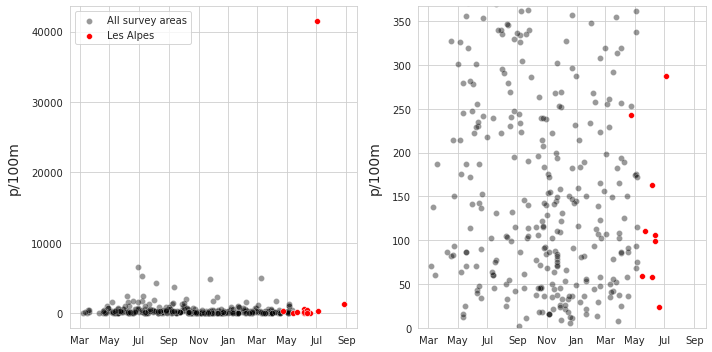

In [13]:
# months locator, can be confusing
# https://matplotlib.org/stable/api/dates_api.html
months = mdates.MonthLocator(interval=1)
months_fmt = mdates.DateFormatter('%b')
days = mdates.DayLocator(interval=7)

fig, axs = plt.subplots(1,2, figsize=(10,5))

ax = axs[0]

# there is a big value in here, that should be seen.
sns.scatterplot(data=dts_date, x='date', y=unit_label, color='black', alpha=0.4, label=level_names[1], ax=ax)
sns.scatterplot(data=fd_dt, x='date', y=unit_label, color='red', s=34, ec='white',label=level_names[0], ax=ax)

ax.set_xlabel("")
ax.set_ylabel(unit_label, **ck.xlab_k14)

ax.xaxis.set_minor_locator(days)
ax.xaxis.set_major_formatter(months_fmt)

axtwo = axs[1]

# set the ylimit to something reasonbale on axis 2
# here we use the 75th percentile the Rhône survey area
axtwo.set_ylim(0,367)

# replot
sns.scatterplot(data=dts_date, x='date', y=unit_label, color='black', alpha=0.4, label=level_names[1], ax=axtwo)
sns.scatterplot(data=fd_dt, x='date', y=unit_label, color='red', s=34, ec='white',label=level_names[0], ax=axtwo)

axtwo.set_xlabel("")
axtwo.set_ylabel(unit_label, **ck.xlab_k14)

axtwo.get_legend().remove()

axtwo.xaxis.set_minor_locator(days)
axtwo.xaxis.set_major_formatter(months_fmt)

plt.tight_layout()
plt.show()
plt.close()

In [14]:
lakes_ecdf = F"""
*__Right:__ {level_names[0]} values limited to the 75th percentile of Rhône survey area*
"""
md(lakes_ecdf)


*__Right:__ Les Alpes values limited to the 75th percentile of Rhône survey area*


### Summary data and material types

In [15]:
# figure caption
summary_of_survey_totals = F"""
*__Left:__ {level_names[0]} summary of survey totals*
"""
md(summary_of_survey_totals)


*__Left:__ Les Alpes summary of survey totals*


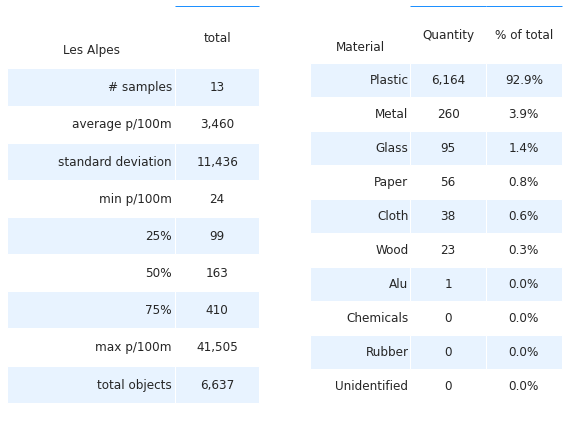

In [16]:
# the labels for the summary table:
change_names = {'count':'# samples', 
                'mean':F"average {unit_label}",
                'std':'standard deviation', 
                'min p/50m':'min', '25%':'25%',
                '50%':'50%', '75%':'75%',
                'max':F"max {unit_label}", 'min':F"min {unit_label}",
                'total objects':'total objects',
                '# locations':'# locations',
                'survey year':'survey year'
               }

# convenience function to change the index names in a series
def anew_dict(x):
    new_dict = {}
    for param in x.index:
        new_dict.update({change_names[param]:x[param]})
    return new_dict  

# select data
data = fd_dt

# get the basic statistics from pd.describe
desc_2020 = data[unit_label].describe().round(2)

# add project totals
desc_2020['total objects'] = data.quantity.sum()
desc_2020['# locations'] = fd.location.nunique()

# change the names
combined_summary = pd.Series(anew_dict(desc_2020))

# format the output for printing:
not_formatted = combined_summary[-1]
combined_summary = [(x, "{:,}".format(int(combined_summary[x]))) for x in combined_summary.index[:-1]]
combined_summary.append((desc_2020.index[-1], int(not_formatted) ))

# make tables
fig, axs = plt.subplots(1,2, figsize=(8,6))

# summary table
# names for the table columns
a_col = [level_names[0], 'total']

axone = axs[0]
ut.hide_spines_ticks_grids(axone)

a_table = axone.table(cellText=combined_summary[:-1],  colLabels=a_col, colWidths=[.5,.25,.25], loc='lower center', bbox=[0,0,1,1])
the_material_table_data = sut.make_a_summary_table(a_table,combined_summary[:-1],a_col, s_et_bottom_row=False)

# material table
axtwo = axs[1]
axtwo.set_xlabel(" ")
ut.hide_spines_ticks_grids(axtwo)
data = fd_mat_t.copy()

# column names for display
cols_to_use = {'material':'Material','quantity':'Quantity', '% of total':'% of total'}

# sort data before formatting
data.sort_values(by='quantity', inplace=True, ascending=False)

# format results
data['% of total'] =(data['% of total']*100).round(1)
data['quantity']=data.quantity.map(lambda x: '{:,}'.format(x))
data['% of total']=data['% of total'].map(lambda x:F"{x}%")

a_table = axtwo.table(cellText=data.values,  colLabels=list(cols_to_use.values()), colWidths=[.4, .3,.3], loc='lower center', bbox=[0,0,1,1])
the_material_table_data = sut.make_a_summary_table(a_table,data,list(cols_to_use.values()), s_et_bottom_row=False)

plt.tight_layout()
plt.subplots_adjust(wspace=0.2)
plt.show()

In [17]:
# figure caption
material_type = F"""
*__Right:__ {level_names[0]} material type and percent of total*
"""
md(material_type)


*__Right:__ Les Alpes material type and percent of total*


## The most common objects

The most common objects are **the ten most abundant by quantity found** AND/OR **any object that was indentified in at least 50% of all the surveys**. 

In [18]:
# the top ten by quantity
most_abundant = fd_code_t.sort_values(by='quantity', ascending=False)[:10]

# merge with most_common and drop duplicates
m_common = pd.concat([most_abundant, most_common]).drop_duplicates()

# get percent of total
m_common_percent_of_total = m_common.quantity.sum()/fd_code_t.quantity.sum()

# figure caption
rb_string = F"""
*{level_names[0]} most common objects: fail rate > {a_fail_rate}%  and/or top ten by quantity. 
Combined, the ten most abundant objects represent {int(m_common_percent_of_total*100)}% of all objects found, {unit_label}: median survey value.*
"""
md(rb_string)


*Les Alpes most common objects: fail rate > 50%  and/or top ten by quantity. 
Combined, the ten most abundant objects represent 92% of all objects found, p/100m: median survey value.*


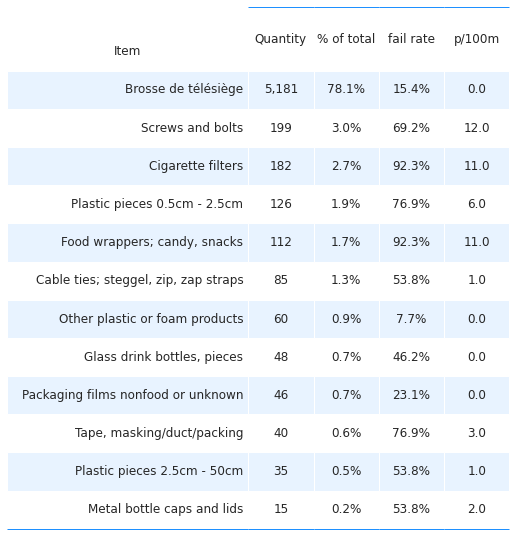

In [19]:
# format values for table
m_common['item'] = m_common.index.map(lambda x: code_description_map.loc[x])
m_common['% of total'] = m_common["% of total"].map(lambda x: F"{x}%")
m_common['quantity'] = m_common.quantity.map(lambda x: '{:,}'.format(x))
m_common['fail rate'] = m_common['fail rate'].map(lambda x: F"{x}%")
m_common[unit_label] = m_common[unit_label].map(lambda x: F"{np.ceil(x)}")

# final table data
cols_to_use = {'item':'Item','quantity':'Quantity', '% of total':'% of total', 'fail rate':'fail rate', unit_label:unit_label}
all_survey_areas = m_common[cols_to_use.keys()].values

fig, axs = plt.subplots(figsize=(9,len(m_common)*.8))

ut.hide_spines_ticks_grids(axs)

the_first_table_data = axs.table(all_survey_areas,  colLabels=list(cols_to_use.values()), colWidths=[.48, .13,.13,.13, .13], bbox=[0, 0, 1, 1])

a_summary_table_one = sut.make_a_summary_table(the_first_table_data,m_common,list(cols_to_use.values()), a_color)

plt.show()
plt.tight_layout()
plt.close()

### Most common objects: results by survey location

In [20]:
rb_string = F"""
*{level_names[0]} most common objects: median {unit_label}*

*All locations and samples*
"""
md(rb_string)


*Les Alpes most common objects: median p/100m*

*All locations and samples*


In [21]:
# aggregated survey totals for the most common codes for all the water features 
m_common_st = fd[fd.code.isin(m_common.index)].groupby(["location", 'loc_date','code'], as_index=False).agg(agg_pcs_quantity)
m_common_ft = m_common_st.groupby(["location", 'code'], as_index=False)[unit_label].median()

# proper name of water feature for display
# m_common_ft['f_name'] = m_common_ft.water_name_slug.map(lambda x: wname_wname.loc[x][0])

# map the desctiption to the code
m_common_ft['item'] = m_common_ft.code.map(lambda x: code_description_map.loc[x])

# pivot that
m_c_p = m_common_ft[['item', unit_label, 'location']].pivot(columns='location', index='item')
# quash the hierarchal column index
m_c_p.columns = m_c_p.columns.get_level_values(1)

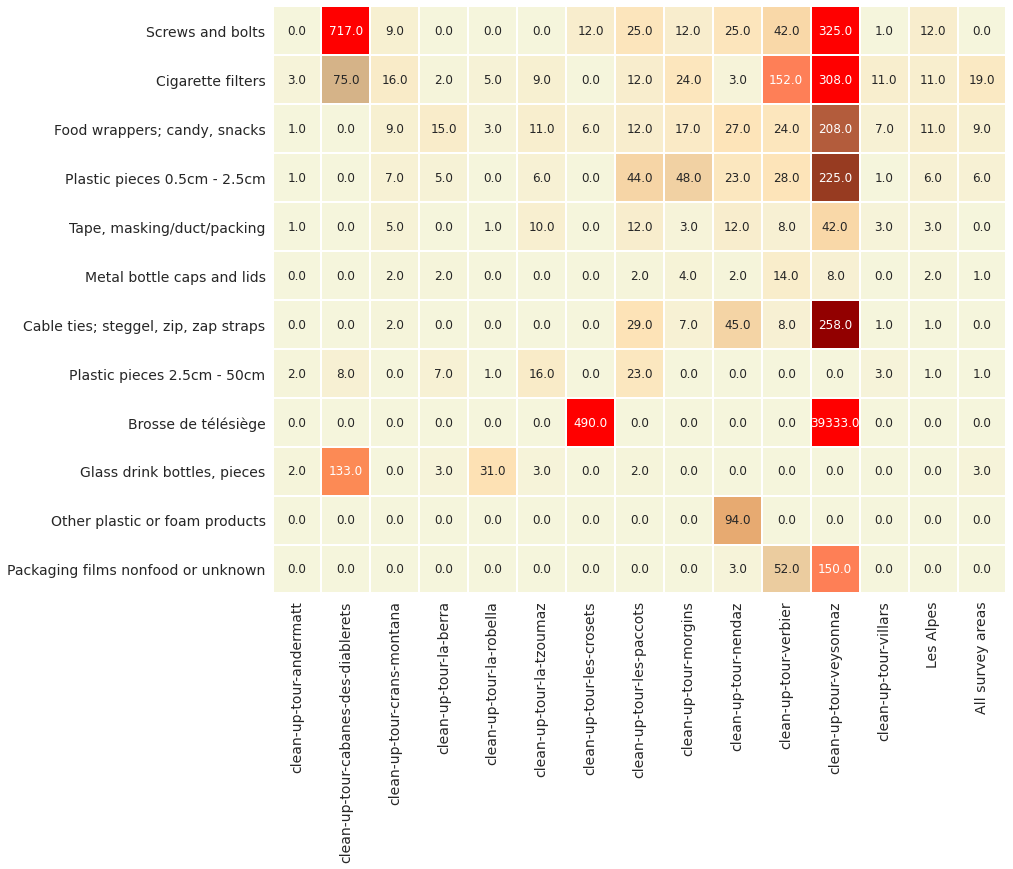

In [22]:


# the aggregated totals for the survey area 
fd_mc = fd[fd.code.isin(m_common.index)].groupby(["location", 'loc_date','code'], as_index=False).agg(agg_pcs_quantity)
fd_mc = fd_mc.groupby('code', as_index=False)[unit_label].median()

# set the item, index and column name for the aggregated survey area results
fd_mc['item'] = fd_mc.code.map(lambda x: code_description_map.loc[x])
fd_mc.set_index('item', inplace=True)

# the column of values for the survey area
fd_mc[level_names[0]] = fd_mc[unit_label]

# the column value for all the survey areas
a_s_a = a_data[a_data.code.isin(m_common.index)].groupby(["location", 'loc_date','code'], as_index=False).agg(agg_pcs_quantity)
a_s_a = a_s_a.groupby('code', as_index=False)[unit_label].median()
a_s_a['item'] = a_s_a.code.map(lambda x: code_description_map.loc[x])
a_s_a.set_index('item', inplace=True)
a_s_a[level_names[1]] = a_s_a[unit_label]

# merge all that
ad_t_ten = pd.concat([m_c_p, fd_mc[level_names[0]], a_s_a[level_names[1]],], axis=1).sort_values(by=level_names[0], ascending=False)

# chart that
fig, ax  = plt.subplots(figsize=(len(ad_t_ten.columns)*.9,len(ad_t_ten)*.9))
axone = ax

sns.heatmap(ad_t_ten, ax=axone,  annot=True,vmax=300, annot_kws={"fontsize":12}, cmap=cmap2, fmt=".1f", square=True, cbar=False, linewidth=.1, linecolor='white')

axone.set_ylabel("")
axone.tick_params(labelsize=14, which='both', axis='both')

plt.setp(axone.get_xticklabels(), rotation=90)

plt.show()
plt.close()

*High survey results from Veysonnaz. The cabin brushes used to remove ice and snow from skilifts can seperated from the instalation. Leaving thousands of heavy guage plastic filaments.*

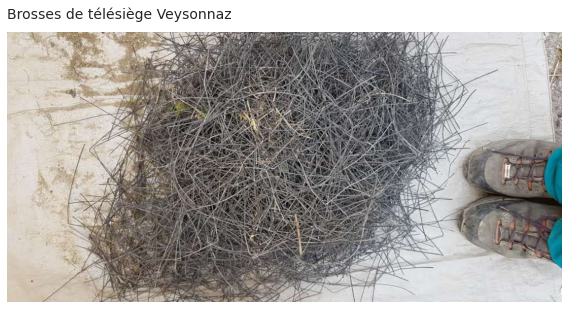

In [23]:
teamv = PILImage.open("resources/images/veysonnaz_brosse.jpg")
# transposed  = teamv.rotate(90)
# output = io.BytesIO()
# # transposed.thumbnail((800,450))
# transposed.save(output, format='PNG')
# encoded_string = base64.b64encode(output.getvalue()).decode()

# html = '<img src="data:image/png;base64,{}"/>'.format(encoded_string)
# IPython.display.HTML(html)

# read images
# img_a = mpimg.imread('resources/codegroups/images/industrialsheeting_800_600.jpg')
# img_b = mpimg.imread('resources/codegroups/images/20210419yverdon_rec.jpg')
# img_c = mpimg.imread('resources/codegroups/images/infrastructure_450_600.jpg')
# img_d = mpimg.imread('resources/codegroups/images/20201220_wt_pi_crop.jpg')

# display images
fig, ax = plt.subplots(figsize=(8,4.5))

axone=ax
ut.hide_spines_ticks_grids(axone)
axone.imshow(teamv);
axone.set_title("Brosses de télésiège Veysonnaz", **ck.title_k14)

# axtwo=ax[0,1]
# ut.hide_spines_ticks_grids(axtwo)
# axtwo.imshow(teamv);
# axtwo.set_title("Recreation: toys, fireworks, shotgun cartridge, fishing items", **ck.title_k14)
# axthree=ax[1,0]
# ut.hide_spines_ticks_grids(axthree)
# axthree.imshow(img_c);
# axthree.set_title("Infrastructure: construction plastics", **ck.title_k14)
# axfour=ax[1,1]
# ut.hide_spines_ticks_grids(axfour)
# axfour.set_title("Wastewater and Personal items: bio filters, sanitary pad, syringe", **ck.title_k14)
# axfour.imshow(img_d);



plt.tight_layout()
plt.show()

## Utility of the objects found

The utility type is based on the utilization of the object prior to it being discarded. Objects that are found are placed into to one of the 260 categories. Those categories are grouped according to utilization.

*  **wastewater**: items released from water treatment plants includes items likely toilet flushed   
*  **micro plastics (< 5mm)**: fragmented plastic items and pre-production plastic resins
*  **infrastructure**: items related to construction and maintenance of all infrastructure items 
*  **food and drink**: primarily single use plastic items related to consuming food and drinks outdoors  
*  **agriculture**: primarily industrial sheeting includes mulch films
*  **tobacco**: primarily cigarette ends includes all smoking related material 
*  **recreation**: includes fishing, hunting, boating and beach related objects, excludes food, drink and tobacco items   
*  **packaging non food and drink**: packaging or wrapping material not identified as food, drink nor tobacco related  
*  **plastic fragments**: foam and plastic fragments of indeterminate origin and use 
*  **personal items**: accessories, hygiene and clothing related 

See the annex for the complete list of objects identified, includes category and group classification

In [24]:
cg_poft = F"""
<br></br>
{level_names[0]} utility of objects found: % of total by water feature. Fragmented objects with no clear identification remain classified by size
"""
md(cg_poft)


<br></br>
Les Alpes utility of objects found: % of total by water feature. Fragmented objects with no clear identification remain classified by size


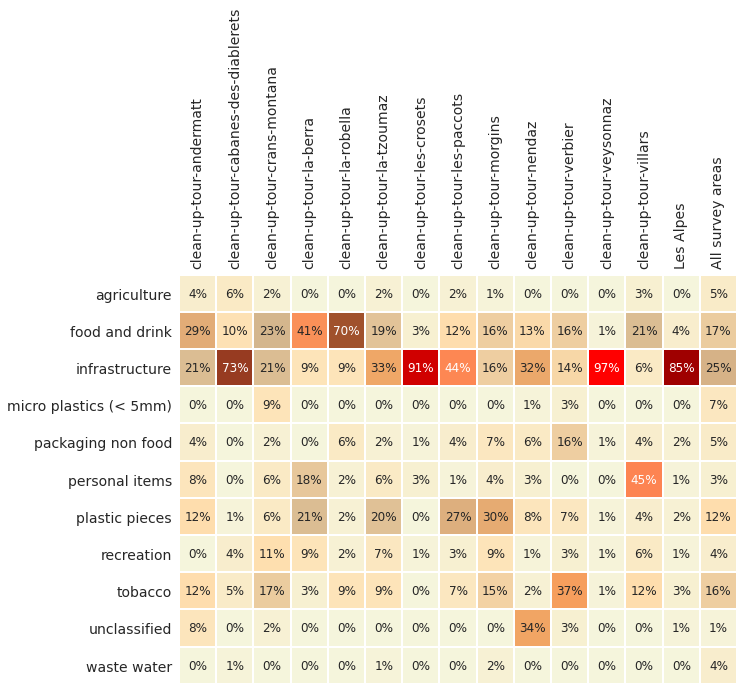

In [25]:
# code groups aggregated by survey for each water feature in the survey area
cg_t = fd.groupby(["location",'loc_date', 'groupname'], as_index=False).agg(agg_pcs_quantity)

# get the fail rates for each group per survey
cg_t['fail']=False
cg_t['fail'] = cg_t.quantity.where(lambda x: x == 0, True)

# aggregate all that for each water feature
cg_t = cg_t.groupby(["location", 'groupname'], as_index=False).agg({unit_label:'median', 'quantity':'sum', 'fail':'sum', 'loc_date':'nunique'})

# quantity per water feature
cg_tq = cg_t.groupby("location").quantity.sum()

# assign the water feature total to each record
for a_feature in cg_tq.index:
    cg_t.loc[cg_t.location == a_feature, 'f_total'] = cg_tq.loc[a_feature]

# get the percent of total for each group for each water feature
cg_t['pt'] = (cg_t.quantity/cg_t.f_total).round(2)

# pivot that
data_table = cg_t.pivot(columns="location", index='groupname', values='pt')

# add a column for the survey area totals and the national totals:
# the aggregated totals for the survey area

# the median value is always calculated from the survey result:
sa_cg = fd.groupby(["location", 'loc_date','groupname'], as_index=False).agg(agg_pcs_quantity)

# aggregate all data
fd_cg = sa_cg.groupby('groupname', as_index=False).agg({unit_label:'median', 'quantity':'sum'})

# add percent of total column
fd_cg['pt'] = (fd_cg.quantity/fd_cg.quantity.sum()).round(2)

# set the index
fd_cg.set_index('groupname', inplace=True)

# name survey area column
fd_cg[level_names[0]] = fd_cg['pt']

# repeat for all data
a_s_a = a_data.groupby(["location", 'loc_date','groupname'], as_index=False).agg(agg_pcs_quantity)
a_s_a = a_s_a.groupby('groupname', as_index=False).agg({unit_label:'median', 'quantity':'sum'})
a_s_a['pt'] = (a_s_a.quantity/a_s_a.quantity.sum()).round(2)
a_s_a.set_index('groupname', inplace=True)
a_s_a[level_names[1]] = a_s_a['pt']

data = pd.concat([data_table, fd_cg[level_names[0]], a_s_a[level_names[1]]], axis=1)
# data.rename(columns={x:wname_wname.loc[x][0] for x in data.columns[:-2]}, inplace=True)
# data = data.applymap(lambda x: F"{x}%")

fig, ax = plt.subplots(figsize=(10,10))

axone = ax
sns.heatmap(data , ax=axone, cmap=cmap2, annot=True, annot_kws={"fontsize":12}, cbar=False, fmt='.0%', linewidth=.1, square=True, linecolor='white')

axone.set_ylabel("")
axone.tick_params(labelsize=14, which='both', axis='both', labeltop=True, labelbottom=False)

plt.setp(axone.get_xticklabels(), rotation=90, fontsize=14)
plt.setp(axone.get_yticklabels(), rotation=0, fontsize=14)

plt.show()

In [26]:
# median p/50m solve cg_t for unit_label
data_table = cg_t.pivot(columns="location", index='groupname', values=unit_label)

# survey area median
fd_cg[level_names[0]] = fd_cg[unit_label]

# all survey area median
a_s_a[level_names[1]] = a_s_a[unit_label]

# merge with data_table
data = pd.concat([data_table, fd_cg[level_names[0]], a_s_a[level_names[1]]], axis=1)

cg_medpcm = F"""
<br></br>
{level_names[0]} utility of objects found: median {unit_label}. Fragmented objects with no clear identification remain classified by size
"""
md(cg_medpcm)


<br></br>
Les Alpes utility of objects found: median p/100m. Fragmented objects with no clear identification remain classified by size


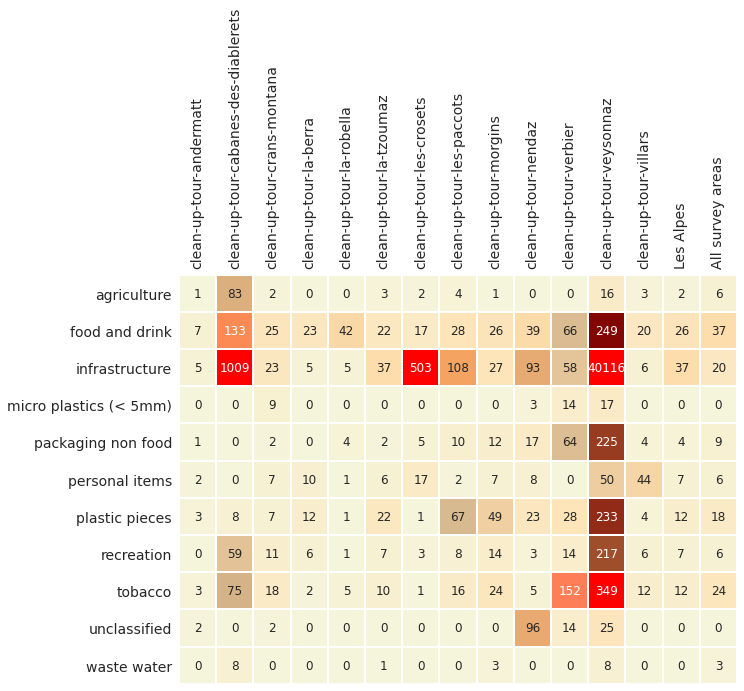

In [27]:
fig, ax = plt.subplots(figsize=(10,10))

axone = ax
sns.heatmap(data , ax=axone, cmap=cmap2, vmax=300, annot=True, annot_kws={"fontsize":12}, fmt='g', cbar=False, linewidth=.1, square=True, linecolor='white')

axone.set_ylabel("")
axone.tick_params(labelsize=14, which='both', axis='both', labeltop=True, labelbottom=False)

plt.setp(axone.get_xticklabels(), rotation=90, fontsize=14)
plt.setp(axone.get_yticklabels(), rotation=0, fontsize=14)

plt.show()

## Alpes valaisannes with respect to all surveys

*Left: point estimates of percentile ranking of Alpes Valaisannes survey totals with respect to all survey totals* 

*Values greater than 2,500p/50m not shown*

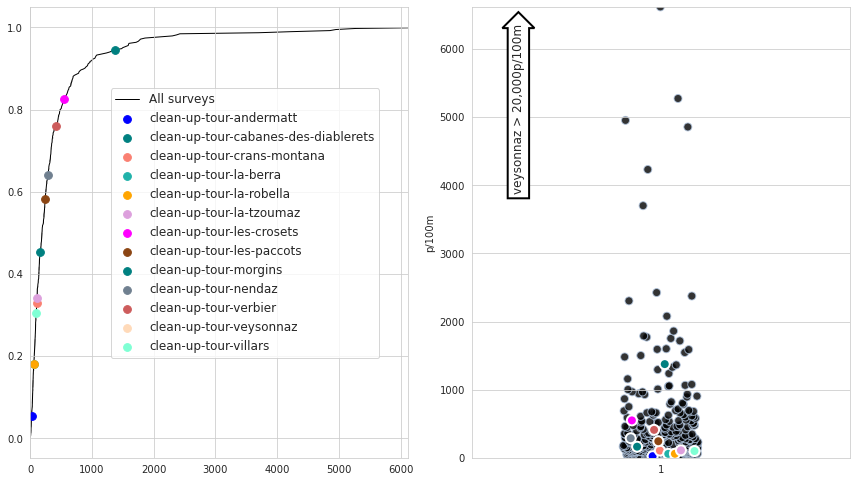

In [28]:
# the background data
ec_adata = ECDF(a_data[a_data.river_bassin != 'les-alpes'].groupby('loc_date')[unit_label].sum().to_numpy())

# common items
m_common_m = fd[(fd.code.isin(m_common.index))].groupby(['loc_date','date','code', 'groupname'], as_index=False).agg(agg_pcs_quantity)

# colors for a palette
a_list = ['blue','teal','salmon','lightseagreen','orange','plum', 'magenta', 'saddlebrown', 'teal', 'slategrey', 'indianred', 'peachpuff', 'aquamarine']
alpes_palette = {x:a_list[i] for i,x in enumerate(fd_dt.location.unique())}

fig, axs = plt.subplots(1,2, figsize=(12,7))

axone=axs[0]
axtwo=axs[1]

# the ecdf of all surveys
sns.lineplot(x=ec_adata.x, y=ec_adata.y, color='black', alpha=1, linewidth=1, label="All surveys", ax=axone, zorder=0)

# point estimates of the percentile ranking based off the edcf of all surveys
# place to store the rankings
rankings = {}

# rank and plot
for x in fd_dt.location.unique():
    this_x = fd_dt[fd_dt.location == x][unit_label]
    this_y = ec_adata(this_x)
    rankings.update({x:(this_x, this_y)})
    axone.scatter(this_x, this_y, c=alpes_palette[x], label=x, s=60)

# handle extreme values
axone.set_xlim(0, max(ec_adata.x)-500)

handles, labels = axone.get_legend_handles_labels()
axone.get_legend().remove()

sns.stripplot(x=[1 for x in ec_adata.x], y=ec_adata.x, orient='v', jitter=True, zorder=0, ax=axtwo, edgecolor='lightsteelblue',label='All surveys', linewidth=1, alpha=0.8,size=8,color='black')
sns.stripplot(data=fd_dt, x=[1 for x in fd_dt.location.unique()],  edgecolor='white', linewidth=2, y=unit_label,hue='location', palette=alpes_palette, size=10, color='red')

axtwo.set_ylim(0, max(ec_adata.x))
axtwo.get_legend().remove()

# another way to handle extreme values
axtwo.annotate(F"veysonnaz > 20,000{unit_label}",(.6, .74),  ha="center", va="center", xycoords='figure fraction', rotation=90, size=12,
    bbox=dict(boxstyle="rarrow,pad=0.35", fc="white", ec="black", lw=2))
fig.legend(handles, labels, bbox_to_anchor=(.45,.8), loc="upper right",  fontsize=12)
plt.tight_layout()
plt.show()

*Right: distribution of all survey totals*

## Les Alpes with respect to land use

The AV have two dominant land use features:

* \% to woods
* \% to agriculture

The results from AV are compared to the other survey results that have either _% to woods_ or _% to agg_ within the same range as AV. The ranges for AV are:

* \% to agg: $\approx$ 20 to 66\%
* \% to woods: $\approx$ 19 to 65\%
* population: $\approx$ 1,961 to 10,185

There are 323 samples from 59 locations that have at least one of the charateristics that are within the ranges from AV.  

### Survey totals with respect to land use

In [29]:
# define land use ranges based on the sample data
this_range = (fd["% to agg"].min(), fd["% to agg"].max())
this_range_w = (fd["% to woods"].min(), fd["% to woods"].max())
this_range_p = (fd["population"].min(), fd["population"].max())

# apply them to all the data
# one test for agg -- a dominant land use feature of the sample data
some_data = a_data[(a_data['% to agg'] >= this_range[0])&(a_data['% to agg'] <= this_range[1])].copy()

# one test for woods -- the dominant land use feature of the sample data
some_data_w = a_data[(a_data['% to woods'] >= this_range_w[0])&(a_data['% to woods'] <= this_range_w[1])].copy()

# one test for population -- 
some_data_p = a_data[(a_data['population'] >= this_range_p[0])&(a_data['population'] <= this_range_p[1])].copy()

# remove alpes valaisannes
some_data = some_data[~some_data.location.isin(fd.location.unique())].copy()
some_data_w = some_data_w[~some_data_w.location.isin(fd.location.unique())].copy()
some_data_p = some_data_p[~some_data_p.location.isin(fd.location.unique())].copy()

# the number of samples and locations that have similar land use profiles as AV:
# agg to loc_date for each criteria
# data for charting and comparing
data=some_data.groupby(['loc_date','location','% to agg'], as_index=False)[unit_label].sum()
data_w =some_data_w.groupby(['loc_date','location','% to woods'], as_index=False)[unit_label].sum()
data_p = some_data_p.groupby(['loc_date','location','% to woods', 'population'], as_index=False)[unit_label].sum()
regional = fd.groupby(['loc_date','location','% to agg', '% to woods', 'population'], as_index=False)[unit_label].sum()

# locations that share the characteristics
commonsamps = set(data.loc_date.unique()) & set(data_w.loc_date.unique())& set(data_p.loc_date.unique())
commonlocs = set(data.location.unique()) & set(data_w.location.unique())&set(data_p.location.unique())

# print these out to get the comparison

# print("agg")
# print(this_range)
# print(len(data.location.unique()))
# print(data.loc_date.nunique())
# print("woods")
# print(this_range_w)
# print(len(data_w.location.unique()))
# print(data_w.loc_date.nunique())
# print("p")
# print(this_range_p)
# print(len(data_p.location.unique()))
# print(data_p.loc_date.nunique())
# print(len(commonsamps))
# print(commonlocs)

# make a categorical df for mapping
mat_agg = dfBeaches.loc[data.location.unique()]
mat_agg['match'] = 'agg'
mat_w = dfBeaches.loc[data_w.location.unique()]
mat_w['match'] = 'woods'
mat_p = dfBeaches.loc[data_p.location.unique()]
mat_p['match']='pop'

# merge all that and export to .csv
landusemap = pd.concat([mat_agg, mat_w, mat_p], axis=0)
landusemap.to_csv("output/alpes-valaisannes/lu_comparison.csv", index=False)

*Top left: survey total with respect to % to agg, range=(19%, 66%), locations=59, samples=165*

*Top right: survey total with respect to % to woods, range=(18%, 65%), locations=61, samples=138*

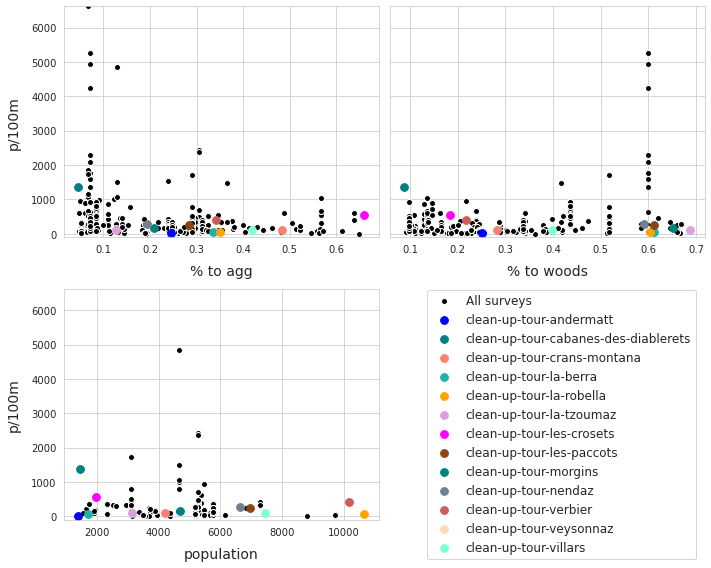

In [30]:
# colors for a palette
# a_list = ['blue','teal','salmon','lightseagreen','orange','plum']
# alpes_palette = {x:a_list[i] for i,x in enumerate(fd_dt.location.unique())}

fig, axs = plt.subplots(2,2, figsize=(10,8), sharey=True)

axone=axs[0,0]
axtwo=axs[0,1]
axthree=axs[1,0]
axfour=axs[1,1]

# plot the samples from all the data that meet the x criteria
sns.scatterplot(data=data, x="% to agg", y=unit_label, color='black', alpha=1, linewidth=1, label="All surveys", ax=axone, zorder=1)

# point estimates of the percentile ranking based off the edcf of all surveys
# place to store the rankings
rankings = {}

# plot the values for AV
for x in regional.location.unique():
    this_y = regional[regional.location == x][unit_label]
    this_x = regional[regional.location == x]["% to agg"]
    axone.scatter(this_x, this_y, color=alpes_palette[x], label=x, s=60, zorder=2)

# handle extreme values
axone.set_ylim(0, max(data[unit_label].to_numpy()))

# set labels
axone.set_ylabel(unit_label, **ck.xlab_k14)
axone.set_xlabel("% to agg", **ck.xlab_k14)

# gather up legend handles
handles, labels = axone.get_legend_handles_labels()
axone.get_legend().remove()

# start axtwo
# plot the samples from all the data that meet the x criteria
sns.scatterplot(data=data_w, x="% to woods", y=unit_label, color='black', alpha=1, linewidth=1, label="All surveys", ax=axtwo, zorder=1)

# plot the values from AV
for x in regional.location.unique():
    this_y = regional[regional.location == x][unit_label]
    this_x = regional[regional.location == x]["% to woods"]
    rankings.update({x:(this_x, this_y)})
    axtwo.scatter(this_x, this_y, color=alpes_palette[x], label=x, s=60, zorder=2)

# handle extreme values
axtwo.set_ylim(0, max(data[unit_label].to_numpy()))

# set labels
axtwo.set_ylabel(unit_label, **ck.xlab_k14)
axtwo.set_xlabel("% to woods", **ck.xlab_k14)
axtwo.get_legend().remove()

# start axthree
# plot the samples from all the data that meet the x criteria
sns.scatterplot(data=data_p, x="population", y=unit_label, color='black', alpha=1, linewidth=1, label="All surveys", ax=axthree, zorder=1)

# plot the values from AV
for x in regional.location.unique():
    this_y = regional[regional.location == x][unit_label]
    this_x = regional[regional.location == x]["population"]
    rankings.update({x:(this_x, this_y)})
    axthree.scatter(this_x, this_y, color=alpes_palette[x], label=x, s=60, zorder=2)

# handle extreme values
axthree.set_ylim(-100, max(data[unit_label].to_numpy()))

# start axfour
# clear axfour
ut.hide_spines_ticks_grids(axfour)

# another way to handle extreme values
# axfour.annotate(F"veysonnaz > 20,000{unit_label}",(.62, .25),  ha="center", va="center", xycoords='figure fraction', rotation=90, size=12,
#     bbox=dict(boxstyle="rarrow,pad=0.35", fc="white", ec="black", lw=2))

# set labels
axthree.set_ylabel(unit_label, **ck.xlab_k14)
axthree.set_xlabel("population", **ck.xlab_k14)
axthree.get_legend().remove()

fig.legend(handles, labels, bbox_to_anchor=(.98,.5), loc="upper right",  fontsize=12)
plt.tight_layout()
plt.show()

*Bottom left: survey total with respect to population, range=(1'961, 10'185), locations=50, samples=107*

### Survey totals percentile ranking with respect to land use

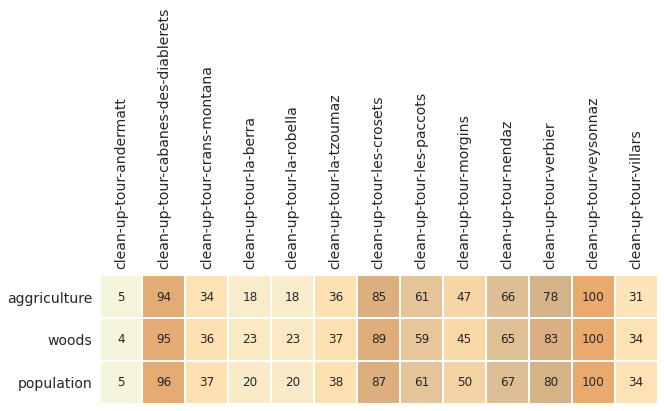

In [31]:
# get the percentile ranking under each condition:

table_data = {}
for i,x in enumerate(fd_dt.location.unique()):
    this_num = fd_dt.loc[fd_dt.location == x, unit_label].values[0]
    a = (stats.percentileofscore(data[unit_label].to_numpy(), this_num))
    b = (stats.percentileofscore(data_p[unit_label].to_numpy(), this_num))
    c = (stats.percentileofscore(data_w[unit_label].to_numpy(), this_num))
    table_data.update({x:{'aggriculture':a, 'woods':b, 'population':c}})

t_data = pd.DataFrame(table_data)
t_data = t_data.astype('int')
t_data.reset_index(inplace=True)
t_data.rename(columns={'index':'variable'}, inplace=True)
t_data.set_index('variable', inplace=True, drop=True)

fig, ax = plt.subplots(figsize=(10,5))

axone = ax
sns.heatmap(t_data , ax=axone, cmap=cmap2, vmax=300, annot=True, annot_kws={"fontsize":12}, fmt='g', cbar=False, linewidth=.1, square=True, linecolor='white')

axone.set_ylabel("")
axone.tick_params(labelsize=14, which='both', axis='both', labeltop=True, labelbottom=False)

plt.setp(axone.get_xticklabels(), rotation=90, fontsize=14)
plt.setp(axone.get_yticklabels(), rotation=0, fontsize=14)

plt.show()

## Discussion

The median value of all surveys in AV  (161) falls within the 95% confidence interval of the median value of all surveys in Switzerland (137 to 188). Veysonnaz is noted as an extreme value for _ski-lift brushes_. This industry specific object is used on all ski lifts in Switzerland, and was observed in 2/6 surveys in important quantities, see section 7.4.

Ski-lift brushes will most likely be a recurring item in the survey list. Not unlike _industrial pellets_ or _small expanded foams_ in the plain, where occasionally large amounts are found at very specific places, see chapter 8.

### Most common objects

The most common objects are 97\% of the total objects found. That is not common at large sample sizes, for example at the national level the most common objects are 68% of the total and only contain 12 objects, see chapter 8. The results in the AV for  infrastructure related items are very similar to food and drink or tobacco items, section 7.5. Cigarette ends did not exceed the national median in the AV, however there were significant values recorded at Verbier, Morgins and Veysonnaz, section 7.4.1.

**Infrastructure items** are an important component of AV survey results. Not counting _ski-lift brushes_, infrastructure is $\approx$ 14\% to 32\% of the survey total, section 7.5. Greater than food or drink and very similar to tobacco. The survey results from AV exceed the national median for specific infrastructure items, section 7.4.1:

1. Screws and bolts
2. Cable ties
3. Masking tape

These items have corresponding high values at Veysonaz, which is a survey completed in proximity to ski lift infrastructure. Morgins and Crans Montanna exceed the national median for these objects inspite of having a total survey value lower than the national median, section 7.7.

**Food and drink** item are $\approx$ 3% to 23% of all items found in the survey area compared to 17% nationally. Snack wrappers are the biggest representative of this group with the maximum value recorded at Veysonnaz, section 7.5 .

### Land use

With respect to landuse 2/6 surveys were less than the national median for the measured attributes, section 7.7.2. This could represent the fluctuations in resident population with respect to the tourism industry. Increases in both infrastructure and food and drink suggest that there are more people and more  infrastructure required to welcome them, section 7.7.2 and chapter 5:Transport.

### Survey method

The method employed at Veysonnaz is effective but needs to be repeated at other survey areas with like charateristics. In total 59 different object types were identified(see Annex) of which 16 account for 97% of all items found, section 7.4. There is a large variety of objects and the surveyors are identifying them. A monitoring strategy for these regions could be developed around future events. A standardization of method would be best for the surveyors and data consistency.

### Data Entry and analysis

In the current application the use was based on two to five users with very little change over. The integration of Summit foundation included many aspects of the domain that had been anticipated but not directly addressed:

1. Definition of survey areas
2. Land use variables
3. Different objects
4. Different use cases
5. Access levels

As a result there was a delay between the time that Summit foundation requested a change or a new location and that the operator had access for data entry. In the end hammerdirt staff entered the data provided by Summit foundation through the application [www.plagespropres.ch](https://www.plagespropres.ch/). This was a _permissions_ based issue and not related to data treatment and analysis. In the end it was better for hammerdirt staff to enter the data including specific code groups for this initial test.

### Valid data: How do we know if we got it?

There are redundant systems to increase the likelihood of data consistency and transparency:

1. The surveyor
2. The training
3. The materials
4. The support

The Surveyor is the most important part of the data collection process. The surveyor must know the terrain and the economic tissue of the region. Together the surveyors train and identify like items, this provides consistency in the results. The base materials and definitions are all provided online to all surveyors. Staff have a primary role of supporting surveyors needs such as data entry or object identification.

The data is as valid as the system that supports it. This data can be accessed with one line of code: _git pull_ from the [repo](https://github.com/hammerdirt-analyst/IQAASL-End-0f-Sampling-2021/)

In [32]:
author = author
my_message = "Love what you do. \u2764\ufe0f"
md(F"""
<br></br>
**This project was made possible by the Swiss federal office for the environment.**<br>

>{my_message}<br>

*{author}* pushed the run button on {today}.<br>
This document originates from https://github.com/hammerdirt-analyst/IQAASL-End-0f-Sampling-2021 all copyrights apply.<br></br>
""")


<br></br>
**This project was made possible by the Swiss federal office for the environment.**<br>

>Love what you do. ❤️<br>

*analyst@hammerdirt* pushed the run button on 2021-09-20.<br>
This document originates from https://github.com/hammerdirt-analyst/IQAASL-End-0f-Sampling-2021 all copyrights apply.<br></br>


## Annex

### fragmented foams and plastics by size group

These are the components of Gfoam and Gfrags, objects labled "Expanded foams" are grouped with Gfoam the rest are grouped under Gfrags.

In [33]:
frag_foams = F"""
*{level_names[0]} fragmented foams and plastics by size group. 

*median {unit_label}, number of pieces, percent of total*
"""
md(frag_foams)


*Les Alpes fragmented foams and plastics by size group. 

*median p/100m, number of pieces, percent of total*


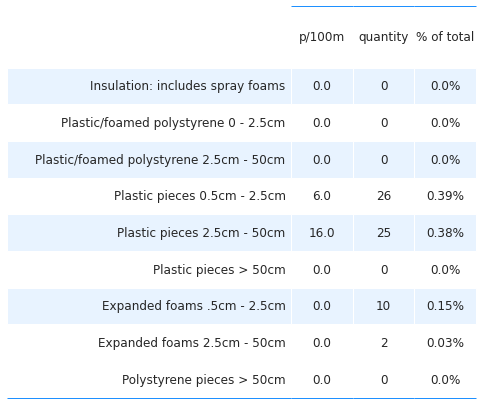

In [34]:
# collect the data before aggregating foams for all locations in the survye area
# the codes for the foams
some_foams = ['G81', 'G82', 'G83', 'G74']

# the codes for the fragmented plastics
some_frag_plas = list(before_agg[before_agg.groupname == 'plastic pieces'].code.unique())

fd_frags_foams = before_agg[(before_agg.code.isin([*some_frag_plas, *some_foams]))&(before_agg.location.isin(fd_locs))].groupby(['loc_date','code'], as_index=False).agg(agg_pcs_quantity)
fd_frags_foams = fd_frags_foams.groupby('code').agg({unit_label:'median', 'quantity':'sum'})

# add code description and format for printing
fd_frags_foams['item'] = fd_frags_foams.index.map(lambda x: code_description_map.loc[x])
fd_frags_foams['% of total'] = (fd_frags_foams.quantity/fd.quantity.sum()*100).round(2)
fd_frags_foams['% of total'] = fd_frags_foams['% of total'].map(lambda x: F"{x}%")
fd_frags_foams['quantity'] = fd_frags_foams['quantity'].map(lambda x: F"{x:,}")

# table data
data = fd_frags_foams[['item',unit_label, 'quantity', '% of total']]

fig, axs = plt.subplots(figsize=(len(data.columns)*2.1,len(data)*.8))
ut.hide_spines_ticks_grids(axs)

the_first_table_data = axs.table(data.values,  colLabels=data.columns, colWidths=[.6, .13, .13, .13], bbox=[0, 0, 1, 1])

a_summary_table_one = sut.make_a_summary_table(the_first_table_data,data.values,data.columns, a_color, s_et_bottom_row=True)

a_summary_table_one.get_celld()[(0,0)].get_text().set_text(" ")

plt.show()
plt.tight_layout()
plt.close()

### Surveyors

Manager: Teo Gursoy
Organization: Summit Foundation

Hammerdirt staff:
1. Bettina Siegenthaler

### Survey locations

In [35]:
# display the survey locations
pd.set_option('display.max_rows', None)
disp_columns = ['latitude', 'longitude', 'city', 'population', 'streets', '% to buildings']
disp_beaches = dfBeaches.loc[fd_locs][disp_columns]
disp_beaches

,latitude,longitude,city,population,streets,% to buildings
slug,,,,,,
clean-up-tour-cabanes-des-diablerets,46.338604,7.215525,Ormont-Dessus,1448.0,9417.0,0.000000
clean-up-tour-nendaz,46.162099,7.283486,Nendaz,6623.0,49738.0,0.019886
clean-up-tour-veysonnaz,46.180334,7.366005,Nendaz,6623.0,65355.0,0.024148
clean-up-tour-andermatt,46.618327,8.598803,Andermatt,1390.0,22019.0,0.000000
clean-up-tour-verbier,46.103981,7.224760,Val de Bagnes,10185.0,84078.0,0.271693
clean-up-tour-crans-montana,46.334214,7.479386,Lens,4198.0,44197.0,0.008439
clean-up-tour-villars,46.321937,7.073841,Ollon,7463.0,38704.0,0.008633
clean-up-tour-les-crosets,46.183591,6.832916,Val-d'Illiez,1961.0,50272.0,0.019886
clean-up-tour-morgins,46.236681,6.858132,Troistorrents,4684.0,66409.0,0.082504


### Inventory of all items

In [36]:
pd.set_option('display.max_rows', None)
complete_inventory = fd_code_t[fd_code_t.quantity>0][['item', 'quantity', 'utility',  '% of total','fail rate']]
complete_inventory

,item,quantity,utility,% of total,fail rate
code,,,,,
G704,Brosse de télésiège,5181,infrastructure,78.1,15.4
G705,Screws and bolts,199,infrastructure,3.0,69.2
G27,Cigarette filters,182,tobacco,2.7,92.3
G78,Plastic pieces 0.5cm - 2.5cm,126,plastic pieces,1.9,76.9
G30,"Food wrappers; candy, snacks",112,food and drink,1.7,92.3
G93,"Cable ties; steggel, zip, zap straps",85,infrastructure,1.3,53.8
G124,Other plastic or foam products,60,unclassified,0.9,7.7
G200,"Glass drink bottles, pieces",48,food and drink,0.7,46.2
G941,Packaging films nonfood or unknown,46,packaging non food,0.7,23.1
